# Machile Learning Assignment 2 
## (Splitting dataset using test_train_split)

<H4>Name: Vikrant Singh Jamwal
<H4>Class: 1MAI1 (Artificial Intelligence)
<H4>Student ID: 23104534

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay, RocCurveDisplay
from scipy import stats

# Preprocessing 

## Data Understanding and Exploration

In [3]:
df=pd.read_csv("Improved_All_Combined_hr_rsp_binary.csv") # Reading the data file

In [4]:
df.head() # To see top 5 rows of the dataset

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [5]:
df.shape # To check the number of rows and columns in the data set (rows, columns)

(112516, 5)

### Visualising the range of each Column

In [6]:
dict={column: [min(df[column]), max(df[column])] for column in list(df.columns)} 
# Created a dictionary with minimum and maximum element of each row.

df_range= pd.DataFrame(dict.items(), columns=['Columns', 'Range'])
df_range


,Columns,Range
0,Participant,"[2, 35]"
1,HR,"[49.0, 146.78]"
2,respr,"[5.204728132, 18.16353247]"
3,Time(sec),"[1644227583, 1646842247]"
4,Label,"[0, 1]"


In [7]:
df.sample(frac=1) # shuffling to view various values

,Participant,HR,respr,Time(sec),Label
67569,22,74.68,8.454816,1646051708,0
107791,34,80.62,12.693767,1646838954,0
106523,34,84.58,12.761950,1646837686,1
64152,21,69.07,12.438481,1646049423,1
36861,13,69.62,15.621630,1645443224,0
...,...,...,...,...,...
58681,19,70.08,12.030993,1646041818,1
73034,24,71.47,12.645726,1646059496,0
2682,2,73.18,12.780532,1644230265,0
91488,29,73.53,10.125188,1646659166,0


Frequency of 0s and 1s are : 
0    75701
1    36815
Name: Label, dtype: int64


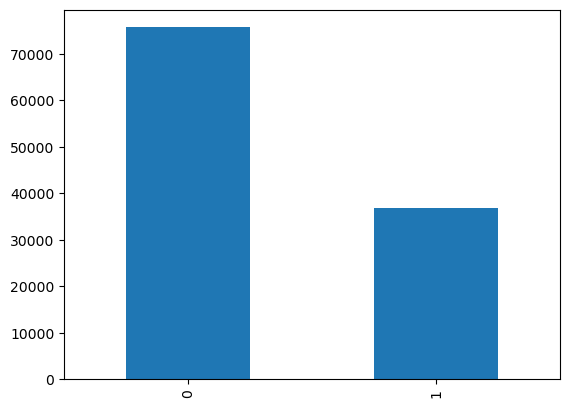

In [8]:
print(f'Frequency of 0s and 1s are : \n{df.Label.value_counts() }')
df['Label'].value_counts().plot.bar();

# data not imbalanced or mildly imbalanced which can be neglected

Checking the data types, as numerical data types are required to compare the features and object datatypes are either removed or transformed according to the importance of the features.

In [9]:
df.dtypes

Participant      int64
HR             float64
respr          float64
Time(sec)        int64
Label            int64
dtype: object

Checking and visualising top 5 null values in each column

In [10]:
df.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [11]:
df[['Label', 'HR']][df['HR'].isnull()].head()

,Label,HR
3555,0,NaN
3556,0,NaN
6865,0,NaN
10395,0,NaN
10396,0,NaN


Dropping the entire row which consists of a null value. Heart rate should not be imputed as different participants have different range of heart rates and imputed value can become an outlier for that participant.

In [12]:
df_cl=df.dropna() 

In [13]:
df_cl.isnull().sum() # checking again for null values

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

## Plotting a bar graph showing the correlation between each feature

<Axes: >

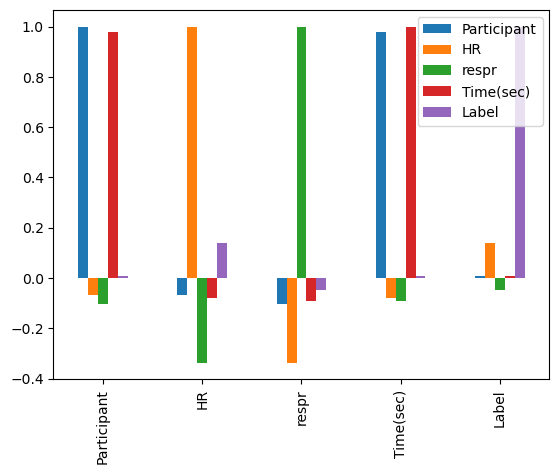

In [14]:
df_cl.corr().plot.bar()

## Changing format UNIX to Minutes

In [15]:

Time=[]
Time_s=[]
for i in df_cl['Time(sec)']:
    Time.append(datetime.utcfromtimestamp(i).strftime('%H%M%S')) # Removing date from the UNIX format.

# Using Minutes
for i in Time:
    Time_s.append(int(i[:2])*60+ int(i[2:4])+ int(i[4:])/60) # Calculating minutes
# Converted hours to minutes (hours*60) and seconds to minutes (seconds/60)

## Creating independent variable X and dependent variable y

In [16]:
X=df_cl.drop(['Label'],axis=1).drop(['Time(sec)'], axis=1).drop(['Participant'], axis=1)
y=df_cl['Label']

#UNIX time sec to timestamp
X['Minutes'] = Time_s

#Feature scaling using Standard Scaler

#feature scaling
scaler= StandardScaler()
df_scaled= scaler.fit_transform(X)
X = pd.DataFrame(df_scaled,columns=X.columns)

X.head()

,HR,respr,Minutes
0,2.967592,-0.16628,-1.478119
1,2.614156,-0.16628,-1.477987
2,1.004059,-0.16628,-1.477855
3,1.023694,-0.16628,-1.477723
4,0.485686,-0.16628,-1.477591


Feature scaling using Standard Scaler

In [17]:
#feature scaling
scaler= StandardScaler()
df_scaled= scaler.fit_transform(X) # Fitting and transforming the Dataset into standard scaler
X = pd.DataFrame(df_scaled,columns=X.columns) # Coverting the output of scaling back to pandas dataframe.

X.head()

,HR,respr,Minutes
0,2.967592,-0.16628,-1.478119
1,2.614156,-0.16628,-1.477987
2,1.004059,-0.16628,-1.477855
3,1.023694,-0.16628,-1.477723
4,0.485686,-0.16628,-1.477591


<Axes: >

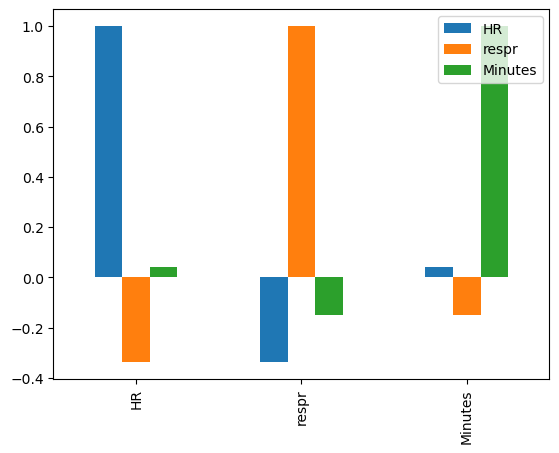

In [18]:
X.corr().plot.bar() # Correlation between independent variables.

# --Assignment 2 --

## Splitting the data between train and test

In [19]:
# First: Spilitting test data and train data.
train_X,test_X,train_y,test_y= train_test_split(X,y, test_size=0.1, stratify=y)

In [20]:
train_y.value_counts()

0    68091
1    33133
Name: Label, dtype: int64

In [21]:
test_y.value_counts()

0    7566
1    3682
Name: Label, dtype: int64

## Splitting the training data between train and validation

In [22]:
training_X, val_X, training_y, val_y= train_test_split(train_X, train_y, stratify=train_y, test_size=0.1)

In [23]:
training_y.value_counts()

0    61281
1    29820
Name: Label, dtype: int64

In [24]:
val_y.value_counts()

0    6810
1    3313
Name: Label, dtype: int64

### Fitting and training Decision tree on training and validation set

In [25]:
dt=DecisionTreeClassifier(max_depth=25) # Creating instance
dt.fit(training_X, training_y) # Fitting Training data
y_pred_dt = dt.predict(val_X) # Predicting values of validation data.
print("Decision Tree")
print(f"Training score: {dt.score(train_X, train_y)*100 :.2f}%")
print(f"Accuracy: {accuracy_score(y_pred_dt, val_y)*100 :.2f}%")
print(f"Classification Report:\n {classification_report(y_pred_dt, val_y)}")

Decision Tree
Training score: 96.58%
Accuracy: 95.62%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      7097
           1       0.89      0.97      0.93      3026

    accuracy                           0.96     10123
   macro avg       0.94      0.96      0.95     10123
weighted avg       0.96      0.96      0.96     10123



### Fitting and training Random Forest on training and validation set

In [26]:
rf=RandomForestClassifier(max_depth=25) # Creating instance
rf.fit(training_X,training_y) # Fitting Training data
y_pred_rf = rf.predict(val_X) # Predicting values of validation data.
print("Random Forest")
print(f"Training score: {rf.score(train_X, train_y)*100 :.2f}")
print(f"Accuracy: {accuracy_score(y_pred_rf, val_y)*100 :.2f}")
print(f"Classification Report:\n {classification_report(y_pred_rf, val_y)}")

Random Forest
Training score: 99.76
Accuracy: 98.06
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      6920
           1       0.95      0.99      0.97      3203

    accuracy                           0.98     10123
   macro avg       0.97      0.98      0.98     10123
weighted avg       0.98      0.98      0.98     10123



### ROC curves and AUC ROC value

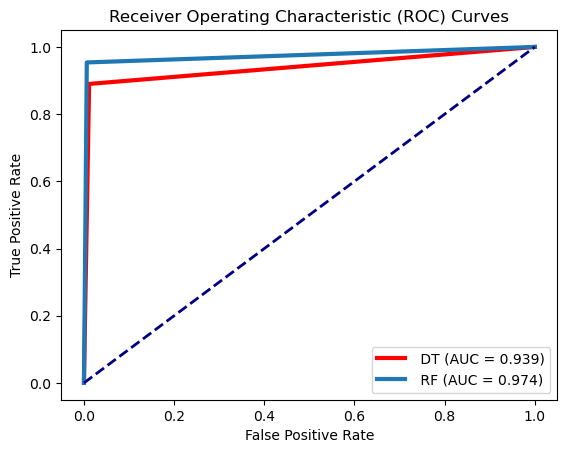

In [27]:
# Decision Tree
fpr, tpr, thresholds = roc_curve(val_y, y_pred_dt) # True positive and false positive using ROC
roc_auc_dt = auc(fpr, tpr) # Calculate the AUC (Area Under the Curve) of the ROC curve
plt.plot(fpr, tpr, lw=3, label=f' DT (AUC = {roc_auc_dt:.3f})', color='red') # Plot the red color ROC curve 

# Random Forest
fpr, tpr, thresholds = roc_curve(val_y, y_pred_rf) # True positive and false positive using ROC
roc_auc_rf = auc(fpr, tpr) # Calculate the AUC (Area Under the Curve) of the ROC curve
plt.plot(fpr, tpr, lw=3, label=f' RF (AUC = {roc_auc_rf:.3f})') # Plot the ROC curve

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')   ;

### Confusion matrix for both classifiers

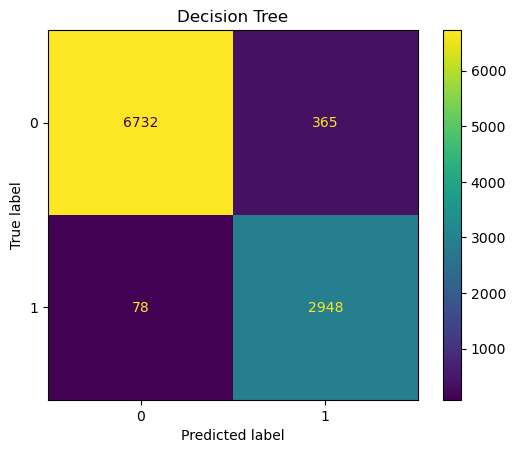

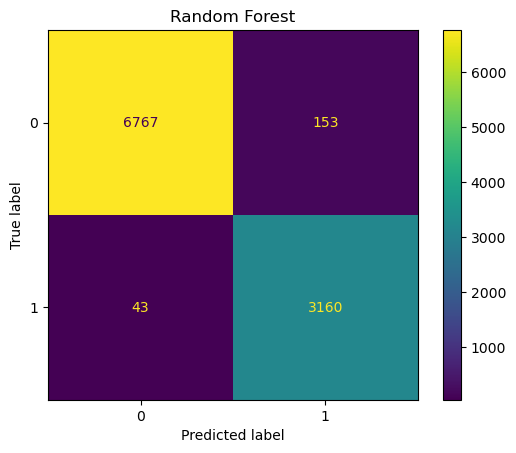

In [28]:
cm_dt=confusion_matrix(y_pred_dt, val_y) # Confusion Matrix for decision tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels = dt.classes_)
disp_dt.plot()
plt.title("Decision Tree")

cm_rf=confusion_matrix(y_pred_rf, val_y) # Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = rf.classes_)
disp_rf.plot()
plt.title("Random Forest");

### Splitting the train data into training and validation set 5 times.
### Storing accuracies of both classifiers on each set of data in the lists.

In [29]:
decision_tree_accuracy=[] # Empty list to store accuracy of decision tree
random_forest_accuracy=[] # Empty list to store accuracy of random forest

# Splitting Train data into training and validation data 5 times.

for i in range(5): # Loop for 5 ierations
    
    # Splitting with validation data as 10%
    training_X, val_X, training_y, val_y= train_test_split(train_X, train_y, test_size=0.1)
    
    # Decision Tree
    dt.fit(training_X, training_y) # Fitting Training data
    y_pred_dt = dt.predict(val_X) # Predicting values of validation data.
    decision_tree_accuracy.append(accuracy_score( y_pred_dt, val_y)*100) # Appending accuracy score in a list.
    
    # Random Forest
    rf.fit(training_X,training_y) # Fitting Training data
    y_pred_rf = rf.predict(val_X) # Predicting values of validation data.
    random_forest_accuracy.append(accuracy_score(y_pred_rf, val_y)*100) # Appending accuracy score in a list.
    

In [30]:
print(f" Decision Tree Accuracies:\n {decision_tree_accuracy}") # Viewing the list of accuracies of Decision tree

print(f" Random Forest Accuracies:\n {random_forest_accuracy}") # Viewing the list of accuracies of Random forest

 Decision Tree Accuracies:
 [96.47337745727552, 97.40195594191445, 95.3867430603576, 96.71046132569397, 95.93006025881655]
 Random Forest Accuracies:
 [98.26138496493134, 97.94527314037342, 97.93539464585596, 97.94527314037342, 98.03417959103032]


In [31]:
print(f"Mean Accuracy of Decision Tree: {np.mean(decision_tree_accuracy) :.3f}%") 

print(f"Mean Accuracy of Random Forest: {np.mean(random_forest_accuracy) :.3f}%")  

Mean Accuracy of Decision Tree: 96.381%
Mean Accuracy of Random Forest: 98.024%


## Paired T-Test

* We are comparing two classifiers (Decision Tree and Random Forest) on same dataset.

In [32]:
alpha=0.05 # Significance value

# using stats.ttest_rel to return p-value and t-statistic
t_stat, p_value = stats.ttest_rel(decision_tree_accuracy, random_forest_accuracy) 

In [33]:
print(f"T-statistics value: {t_stat}")

T-statistics value: -4.7160198344892565


In [34]:
print(f"P-value: {p_value}") # Viewing p-value

P-value: 0.009198616423379881


In [35]:
#Comparing p-value with significance value alpha

if p_value<alpha: # p-value less than alpha --> Significant difference is there
    print("As p_value < alpha, we reject null hypothesis.\nHence, there is a SIGNIFICANT DIFFERENCE")
    
    if np.mean(decision_tree_accuracy)>np.mean(random_forest_accuracy): # Comparing the mean to know which is better
        print("Decision Tree is better than Random Forest") # Higher the average accuracy, better the classifier.
    else:
        print("Random Forest is better than Decision Tree")
        
else:
    print("No significant difference") # p-value more than significance value alpha --> No significance difference

As p_value < alpha, we reject null hypothesis.
Hence, there is a SIGNIFICANT DIFFERENCE
Random Forest is better than Decision Tree


## Stratified K-Fold (10) cross validation

In [36]:
skf = StratifiedKFold (n_splits=10, shuffle=False, random_state=None) # Stratified K fold classifier

In [37]:
# Using cross val score to evaluate models with Stratified K-fold (K=10) division of train dataset
cross_val_score_dt = cross_val_score(dt, train_X, train_y, cv= skf, scoring = "accuracy")
cross_val_score_rf = cross_val_score(rf, train_X, train_y, cv= skf, scoring = "accuracy")

In [38]:
# Viewing mean of accuracies of each fold for both the models 
print(f"Cross-validation mean_accuracy of Decision Tree: { cross_val_score_dt.mean()*100 :.2f}%")
print(f"Cross-validation mean_accuracy of Random Forest: { cross_val_score_rf.mean()*100 :.2f}%")

Cross-validation mean_accuracy of Decision Tree: 96.05%
Cross-validation mean_accuracy of Random Forest: 98.12%


In [39]:
# Viewing standard deviation of accuracies for both the models 
print(f"Cross-validation standard deviation of Decision Tree: { cross_val_score_dt.std()}")
print(f"Cross-validation standard deviation of Random Forest: { cross_val_score_rf.std()}")

Cross-validation standard deviation of Decision Tree: 0.005673711028728449
Cross-validation standard deviation of Random Forest: 0.0011375306032599202


## Random Forest is better

In [40]:
random_forest_classifier = RandomForestClassifier(n_estimators = 25, max_depth = 25) #Creating random forest classifier

In [41]:
random_forest_classifier.fit(train_X, train_y) # Fitting onto train dataset

RandomForestClassifier(max_depth=25, n_estimators=25)

In [42]:
prediction_y = random_forest_classifier.predict(test_X) # Predicted on unseen data (Test data) 

In [43]:
fpr, tpr, thresholds = roc_curve(prediction_y, test_y) # True positive and false positive using ROC
roc_auc_rf = auc(fpr, tpr) # Calculate the AUC (Area Under the Curve) of the ROC curve

print(f"Training Score: {random_forest_classifier.score(train_X, train_y)*100 :.2f}%") # Training score
print(f"Accuracy of Random Forest: {accuracy_score(prediction_y, test_y)*100 :.2f} %") # Accuracy
print(f"AUC ROC of Random Forest: {roc_auc_rf*100 :.2f} %\n") # AUROC 
print(f"Classification Report:\n {classification_report(prediction_y, test_y)}") # Classification Report

Training Score: 99.92%
Accuracy of Random Forest: 97.66 %
AUC ROC of Random Forest: 97.78 %

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7693
           1       0.95      0.98      0.96      3555

    accuracy                           0.98     11248
   macro avg       0.97      0.98      0.97     11248
weighted avg       0.98      0.98      0.98     11248



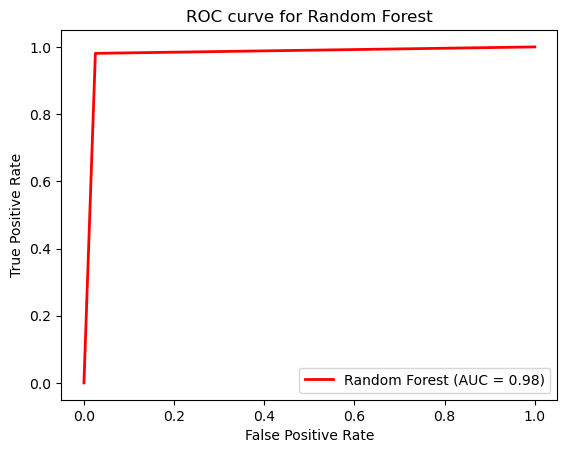

In [44]:
# ROC curve plot
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_rf, estimator_name='Random Forest') 
display.plot(lw=2, color='red')
plt.title("ROC curve for Random Forest"); 

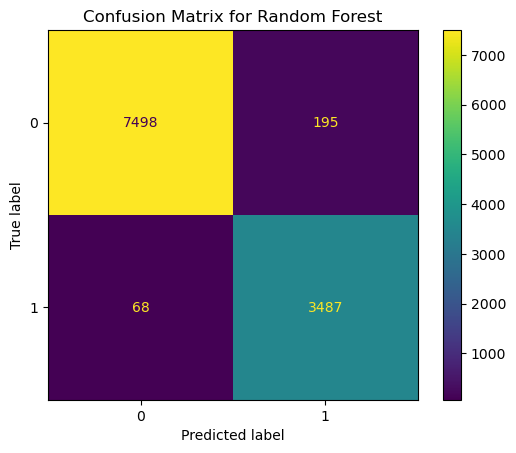

In [45]:
# Confusion Matrix
cm_rf = confusion_matrix( prediction_y, test_y ) # Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = random_forest_classifier.classes_)
disp_rf.plot()
plt.title("Confusion Matrix for Random Forest");